# TP 2 : k-plus proches voisins, analyse discriminante linéaire et régression logistique
## Génération artificielle de données

In [253]:
import matplotlib.pyplot as plt

from scipy.stats import norm
import tp_knn_source as sc
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from functools import partial
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import figure

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1) Étudiez les fonctions rand_bi_gauss, rand_tri_gauss, rand_clown et rand_checkers. Que renvoient ces fonctions ? À quoi correspond la dernière colonne ?


In [233]:
set1 = sc.rand_bi_gauss(n1=20, n2=20,mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],
                  sigmas2=[0.9, 0.9])
set2 = sc.rand_tri_gauss(n1=50, n2=50, n3=50, mu1=[1, 1],
                   mu2=[-1, -1], mu3=[1, -1], sigma1=[0.9, 0.9],
                   sigma2=[0.9, 0.9], sigma3=[0.9, 0.9])
set3 = sc.rand_clown(n1=50, n2=50, sigma1=1, sigma2=5)
set4 = sc.rand_checkers(n1=150, n2=150)

set1_uneven = sc.rand_bi_gauss(n1=20, n2=200,mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],
                  sigmas2=[0.9, 0.9])

sets = [set1,set2,set3,set4]

2) Utilisez la fonction plot_2d afin d’afficher les jeux de données générés avec chacune des fonctions.

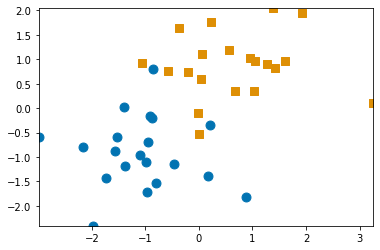

In [3]:
sc.plot_2d(set1[0], set1[1])

## Approche intuitive
3) Proposez une version adaptée de cette méthode pour la régression, i.e., quand les observations y
sont à valeurs réelles : Y = R.

One of the possibilities is to adapt this method to regression would be to attribue weights to the average k closest neighbours of x

## Approche formelle
4) Écrivez votre propre classe KNNClassifier avec les méthodes d’apprentissage fit et de classification
predict.

In [4]:
class my_KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade kNN classifier class """
    def __init__(self, n_neighbors=1):
        self.X = None
        self.Y = None
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = X
        self.Y = y
        return self

    def predict(self, X):
        dist = pairwise_distances(self.X,X)
        idx = np.argpartition(dist, self.n_neighbors,axis=0)[:self.n_neighbors]
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=self.Y[idx].astype(int))

In [5]:
train_percent = 0.7 # between 0 and 1
workingSet = set2
X = workingSet[0]
Y = workingSet[1]
train_number = int(X.shape[0]*train_percent) # is approximative however relative well for our use
X_train, X_test = X[:train_number], X[train_number:]
Y_train, Y_test = Y[:train_number], Y[train_number:]

my_classifier = my_KNNClassifier(n_neighbors=9)
my_classifier = my_classifier.fit(X_train,Y_train)
my_pred = my_classifier.predict(X_test)

not_my_classifier = KNeighborsClassifier(n_neighbors=9)
not_my_classifier = not_my_classifier.fit(X_train,Y_train)
not_my_pred = not_my_classifier.predict(X_test)

resultdf = my_pred == not_my_pred
print(f'Are the result from my prediction equal to the ones by scikitlearn ? {resultdf.all()}')

Are the result from my prediction equal to the ones by scikitlearn ? True


5)Faites tourner sur les quatre exemples de jeu de données cet algorithme de classification, en utilisant la distance euclidienne classique d(x, v) = ∥x − v∥2 et k = 5. Visualisez les règles de classification obtenues en utilisant la fonction frontiere_new. (Souvent, les autres choix de distance peuvent être utiles, par exemple la distance de Mahalanobis.)

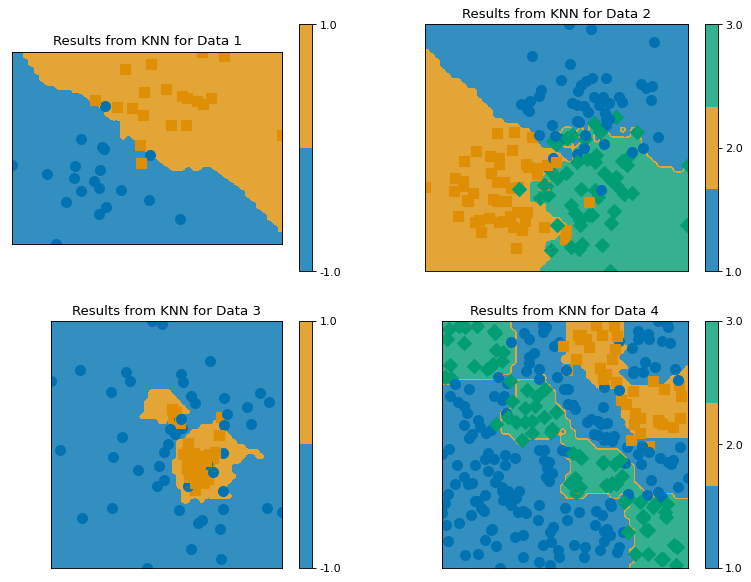

In [6]:
def frontiere_predict(Xnew, model, X):
    Xnew = Xnew.reshape(-1,X.shape[1])
    return model.predict(Xnew)

knn = KNeighborsClassifier(n_neighbors=5)
_=figure(figsize=(12, 9), dpi=80)
for idx, using_set in enumerate(sets):
    X = using_set[0]
    Y = using_set[1]
    knn = knn.fit(X,Y)
    _=plt.subplot(2, 2,idx+1)
    _=plt.title(f"Results from KNN for Data {idx+1}")
    sc.frontiere_new(partial(frontiere_predict,model=knn,X=X), X,Y)
_=plt.show()

6) Pour les observations d’indice pair du jeu de données #2, faites varier le nombre k de voisins pris en compte : k = 1,2,...,n. Que devient la méthode dans le cas extrême où k = 1? k = n? Afficher ces cas sur les données étudiées en utilisant la fonction frontiere_new et présentez les dans une forme facilement lisible. Dans quels cas la frontière est-elle complexe ? simple ?

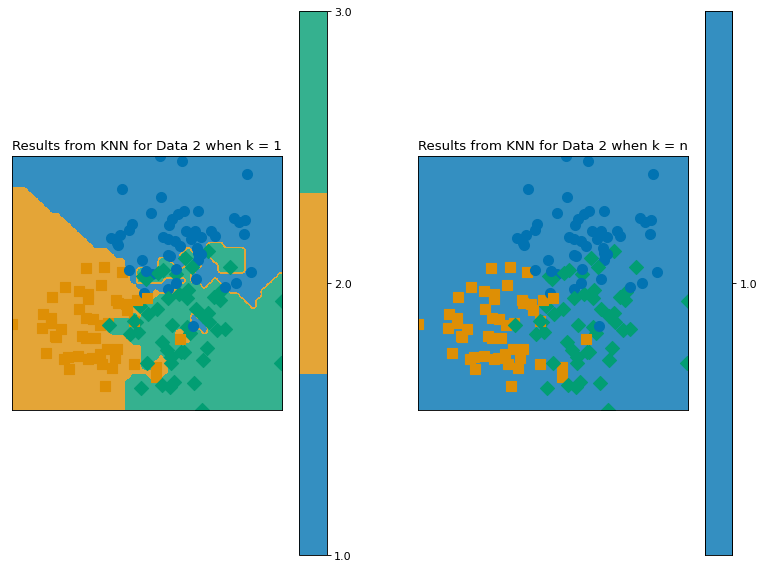

It was quite evident, the resulting model si more complex when k =1 since it predict bast only on the closest entry pointwhereas when k=n the prediction is imply the average of all the points an one area


In [7]:
working_set = set2
X = working_set[0]
Y = working_set[1]

_=figure(figsize=(12, 9), dpi=80)
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X,Y)
_=plt.subplot(1, 2,1)
sc.frontiere_new(partial(frontiere_predict,model=knn,X=X), X,Y)
_=plt.title(f"Results from KNN for Data 2 when k = 1")

_=plt.subplot(1, 2,2)
knn = KNeighborsClassifier(n_neighbors=X.shape[0])
knn = knn.fit(X,Y)
sc.frontiere_new(partial(frontiere_predict,model=knn,X=X), X,Y)
_=plt.title(f"Results from KNN for Data 2 when k = n")
_=plt.show()

print("It was quite evident, the resulting model si more complex when k =1 since it predict bast only on the closest entry point"
      "whereas when k=n the prediction is imply the average of all the points an one area")

7) Une variante possible très utilisée consiste à pondérer les poids du jème voisin selon $e^{-d_{j}^{2} / h}$ Implémentez cette variante dans scikit-learn en passant le paramètre weights au constructeur de KNeighborsClassifier. Pour tester l’impact du choix de h sur les frontières de classification, visualisez les règles de classification pour $k = 7$ et $h = 10^{j}$ avec $j = −2, −1, 0, 1, 2 $; utilisez les observations d’indice pair du jeux de données #2 pour l’entrainement du classifieur (Vous pouvez utiliser la fonction frontiere_new.)

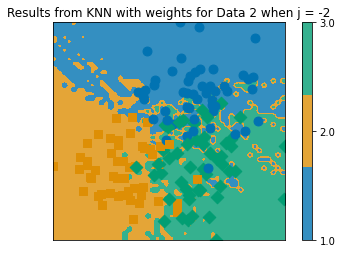

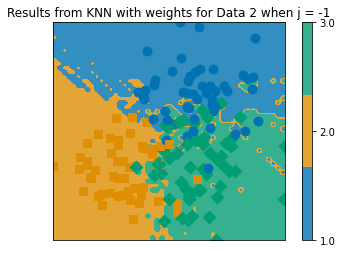

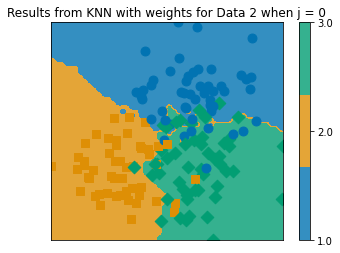

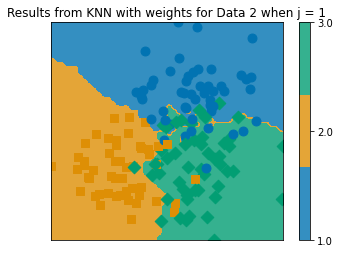

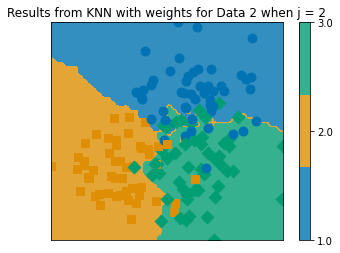

In [8]:
working_set = set2
X = working_set[0]
Y = working_set[1]

js = [-2,-1,0,1,2]


for idx, j in enumerate(js) :
    #_ = plt.subplots(2, 2,idx )
    weight_func = lambda a : np.exp(a/10**j)
    knn = KNeighborsClassifier(n_neighbors=7,weights=weight_func)
    knn = knn.fit(X,Y)
    sc.frontiere_new(partial(frontiere_predict,model=knn,X=X), X,Y)
    _=plt.title(f"Results from KNN with weights for Data 2 when j = {j}")
    _=plt.show()

8) Quel est le taux d’erreur sur les mêmes données d’apprentissage (i.e., la proportion d’erreur faite par le classifieur) lorsque k = 1 ? et sur des données de test (les observations d’indice pair) ?

In [9]:
train_percent = 0.7 # between 0 and 1
workingSet = set1
X = workingSet[0]
Y = workingSet[1]
train_number = int(X.shape[0]*train_percent) # is approximative however relative well for our use
X_train, X_test = X[:train_number], X[train_number:]
Y_train, Y_test = Y[:train_number], Y[train_number:]

knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_pred == Y_test

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

9) Pour le jeu de données #4, en utilisant les observations d’indice pair pour l’apprentissage et les observations d’indice impair pour le test, tracez le taux d’erreur en fonction de k pour k = 1, 2, . . . , 50. Vous pourrez utiliser la classe fournie ErrorCurve.

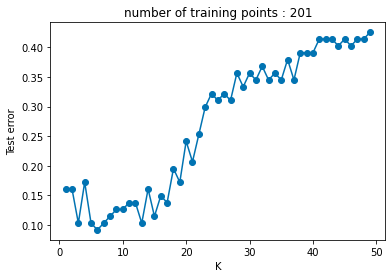

In [10]:
workingSet = set4
train_percent = 0.7 # between 0 and 1
X = workingSet[0]
Y = workingSet[1]
train_number = int(X.shape[0]*train_percent) # is approximative however relative well for our use
X_train, X_test = X[:train_number], X[train_number:]
Y_train, Y_test = Y[:train_number], Y[train_number:]

k_range = list(range(1,50))
er_curve = sc.ErrorCurve(k_range)
er_curve.fit_curve(X_train, Y_train, X_test, Y_test)
er_curve.plot()

10) Tracez les différentes courbes d’erreur en fonction du paramètre k = (1,2,...,50) sur le jeu de données #4, pour des nombres d’échantillons d’entrainement n prenant les valeurs 100, 200, 500 à 1000. Cette fois, tirez l’ensemble d’apprentissage et l’ensemble de test indépendamment et de même taille. Quelle est la meilleure valeur de k ? Est-ce la même pour les différents datasets ?

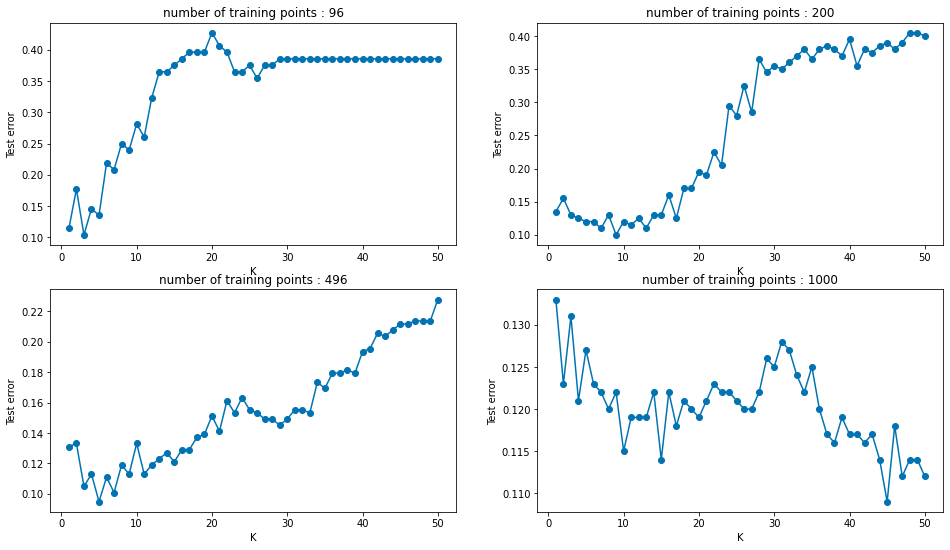

For 100 samples min error is 2 
For 200 samples min error is 8 
For 500 samples min error is 4 
For 1000 samples min error is 44 


In [264]:
_=plt.figure(figsize=(16,9))
samples=[100,200,500,1000]
min_error=[]
for n in samples:
    errorCurve = sc.ErrorCurve(k_range=range(1,51))
    X, y = sc.rand_checkers(n, n, 0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    errorCurve.fit_curve(X_train, y_train, X_test, y_test)
    min_error.append(list(errorCurve.errors).index(min(errorCurve.errors)))
    _=plt.subplot(2,2,1+samples.index(n))
    _=errorCurve.plot()
plt.show()

for idx, n in enumerate(samples):
    print(f"For {n} samples min error is {min_error[idx]} ")

11) A votre avis, quels sont les avantages et les inconvénients de la méthode des plus proches voisins : temps de calcul ? passage à l’échelle ? interprétabilité ?

One of the advantage K nearest neighbors is the interpretability of the algorithms it is easy to visualize what is going on.

The time complexity of knn is O(n×m), where n is the number of training examples and m is the number of dimensions, making it unsuitable for high dimensions and inputs.

12) Étudiez la base digits de scikit-learn.Décrivez la nature et le format des données (précisément), affichez un exemple. Tracez l’histogramme pour des classes. Coupez l’échantillon en deux parties de même taille et utilisez la première partie pour l’apprentissage et la deuxième pour le test. Appliquez la méthode aux données issues de la base digits pour un choix de k ≥ 1 (e.g., k = 30) et indiquez le taux d’erreur.

1797

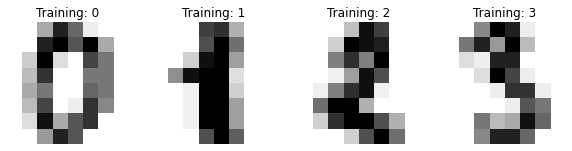

In [11]:

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
n_samples
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.7, shuffle=True
)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    _=ax.set_axis_off()
    _=ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    _=ax.set_title("Training: %i" % label)
_=plt.show()

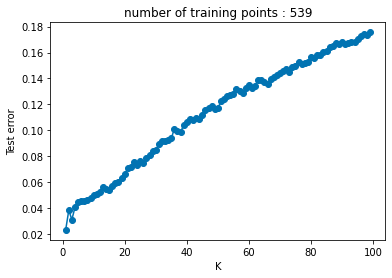

In [12]:
k_range = list(range(1,100))
er_curve = sc.ErrorCurve(k_range)
er_curve.fit_curve(X_train, y_train, X_test, y_test)
er_curve.plot()

In [13]:
knn = KNeighborsClassifier(n_neighbors=30)
knn = knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred == y_test
np.mean(knn_pred == y_test)


array([ True,  True,  True, ...,  True,  True,  True])

0.9149443561208267


13) Estimez la matrice de confusion (P{Y = i, Ck(X) = j})i, j associée au classifieur Ck ainsi obtenu et visualisez celle-ci.

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[118   0   0   0   1   0   0   0   0   0]
 [  0 112   6   1   0   0   1   0   1   1]
 [  1   2 109   7   0   0   0   0   2   0]
 [  0   0   1 115   0   0   0   2   0   1]
 [  1   3   0   0 123   0   0   4   0   0]
 [  1   0   0   1   1 117   4   0   0  14]
 [  1   0   0   0   0   0 124   0   1   0]
 [  0   0   0   0   0   0   0 126   0   0]
 [  0   9   2   2   0   4   0   1 106   2]
 [  1  10   0   3   3   2   0   7   3 101]]
Normalized confusion matrix
[[0.99 0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.92 0.05 0.01 0.   0.   0.01 0.   0.01 0.01]
 [0.01 0.02 0.9  0.06 0.   0.   0.   0.   0.02 0.  ]
 [0.   0.   0.01 0.97 0.   0.   0.   0.02 0.   0.01]
 [0.01 0.02 0.   0.   0.94 0.   0.   0.03 0.   0.  ]
 [0.01 0.   0.   0.01 0.01 0.85 0.03 0.   0.   0.1 ]
 [0.01 0.   0.   0.   0.   0.   0.98 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.07 0.02 0.02 0.   0.03 0.   0.01 0.84 0.02]
 [0.01 0.08 0.   0.02 0.

Text(0.5, 1.0, 'Normalized confusion matrix')

<Figure size 960x720 with 0 Axes>

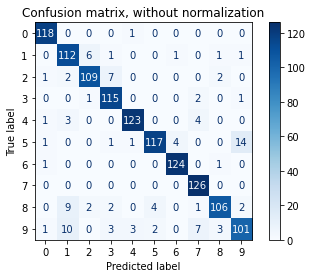

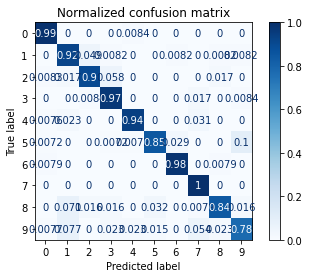

In [14]:
class_names = digits.target_names

np.set_printoptions(precision=2)
_=figure(figsize=(12, 9), dpi=80)
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



14) Proposez une méthode pour choisir k et mettez-la en œuvre. Vous pourrez utiliser la classe fournie LOOCurve. En utilisant toutes les données, tracez la courbe du taux d’erreur leave-one-out pour k = 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200.

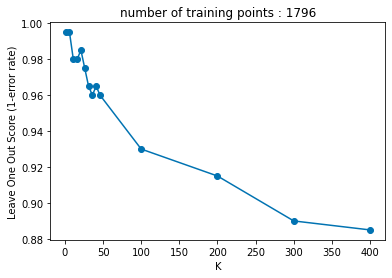

In [15]:
k = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200, 300,400]

loo_curve = sc.LOOCurve(k_range=k)
loo_curve.fit_curve(data, digits.target)
loo_curve.plot()


\begin{align}f(\mathbf{x})=\frac{1}{(2 \pi)^{p / 2} \sqrt{\operatorname{det}(\Sigma)}} \exp \left\{-\frac{1}{2}(\mathbf{x}-\mu)^{\top} \Sigma^{-1}(\mathbf{x}-\mu)\right\}
\end{align}

15) En utilisant la formule de Bayes donner la formule des probabilités a posteriori : P{Y = +1 | X = x}, P{Y =−1|X=x},comme fonctionsde f+,f− et π+.

D'après l'enoncer :
$ \begin{align*}
\mathbb{P}\{ X=\mathbf{x} \mid  Y=+1\} = f_{+}\\
\mathbb{P}\{ X=\mathbf{x} \mid  Y=-1\} = f_{-}\\
\mathbb{P}\{Y=+1\} = \pi_{+}
\end{align*}$


Et que (Bayes Throreme): $\mathbb{P}(A|B)=
\begin{align}
 \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}
 =\frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)} \times \frac{\mathbb{P}(A)}{\mathbb{P}(A)}
 =\frac{\mathbb{P}(A\cap B)}{\mathbb{P}(A)} \times \frac{\mathbb{P}(A)}{\mathbb{P}(B)}
 =\frac{\mathbb{P}(A|B)\mathbb{P}(A)}{\mathbb{P}(B)}
\end{align}$

En substituant
$\begin{align}
A = \mathbb{P}(Y=+1)\\
B = \mathbb{P}(X=\mathbb{x})
\end{align}$
nous avons:

a) $ \mathbb{P}\{Y=+1 \mid X=\mathbf{x}\} = \frac{ \mathbb{P}\{ X=\mathbf{x} \mid  Y=+1\} \mathbb{P}(Y=+1)  }{ \mathbb{P}(X=\mathbb{x}) } = \frac{ f_{+}\pi_{+} } {\mathbb{P}(X=\mathbb{x}) }$

b) $ \mathbb{P}\{Y=-1 \mid X=\mathbf{x}\} = \frac{ \mathbb{P}\{ X=\mathbf{x} \mid  Y=-1\} \mathbb{P}(Y=-1)  }{ \mathbb{P}(X=\mathbb{x}) } = \frac{ f_{-}(1-\pi_{+}) } {\mathbb{P}(X=\mathbb{x}) }$


16) Exprimer le log-ratio des deux classes :

$\log \left(\frac{P\{Y=+1 \mid X=x\}}{P\{Y=-1 \mid X=x\}}\right)=\log \left(\frac{f_{+} \cdot \pi_{+}}{f_{-} \cdot\left(1-\pi_{+}\right)}\right)=\log \left(\frac{f_{+}}{f_{-}}\right)+\log \left(\frac{\pi_{+}}{\left(1-\pi_{+}\right)}\right)$

yet

$\frac{f_{+}}{f_{-}}=\exp \left\{\frac{1}{2}\left[-\left(x-\mu_{+}\right)^{T} \Sigma^{-1}\left(x-\mu_{+}\right)+\left(x-\mu_{-}\right)^{T}\Sigma^{-1}\left(x-\mu_{-}\right)\right]\right\}$

therefore

$\log \left(\frac{P\{Y=+1 \mid X=x\}}{P\{Y=-1 \mid X=x\}}\right)=\left\{\frac{1}{2}\left[-\left(x-\mu_{+}\right)^{T}\Sigma^{-1}\left(x-\mu_{+}\right)+\left(x-\mu_{-}\right)^{T} \Sigma^{-1}\left(x-\mu_{-}\right)\right]\right)+\log \left(\frac{\pi_{+}}{\left(1-\pi_{+}\right)}\right)$


17) Justifier le choix du classifieur suivant :
If we select the classifier 1 if $ P\{Y=+1 \mid X=x\}>P\{Y=-1 \mid X=x\}$
then we select 1 if

$\log \left(\frac{P\{Y=+1 \mid X=x\}}{P\{Y=-1 \mid X=x\}}\right)>0$, equal to

$\left(x^{T} \cdot \hat{\Sigma}^{-1}\left(\hat{\mu}_{+}-\hat{\mu}_{-}\right)-\frac{1}{2} \hat{\mu}_{+}^{T} \hat{\Sigma}^{-1} \hat{\mu}_{+}+\frac{1}{2} \hat{\mu}_{-}^{T} \hat{\Sigma}^{-1} \hat{\mu}_{-}\right)+\log \left(\frac{\hat{\pi}_{+}}{1-\hat{\pi}_{+}}\right)>0$, equal to

$x^{T} . \hat{\Sigma}^{-1}\left(\hat{\mu}_{+}-\hat{\mu}_{-}\right)>\frac{1}{2} \hat{\mu}_{+}^{T} \hat{\Sigma}^{-1} \hat{\mu}_{+}-\frac{1}{2} \hat{\mu}_{-}^{T} \hat{\Sigma}^{-1} \hat{\mu}_{-}-\log \left(\frac{m}{n}\right)+\log \left(1-\frac{m}{n}\right)$

18) Écrivez votre propre classe LDAClassifier avec les méthodes d’apprentissage fit et de classification
predict

In [183]:
from scipy.stats import norm
from matplotlib.pyplot import figure
import matplotlib.pyplot as pp
from sklearn.preprocessing import StandardScaler

class LDAClassifier:

    def fit(self, X , y ):
        self.scaler = StandardScaler()
        self.scaler.fit(X)
        self.X = self.scaler.transform(X)
        self.y = y
        self.groups = np.unique(y)
        W=0
        height, width = X.shape
        for idx, group in enumerate(self.groups):
            Xg = X[self.y ==group]
            W = W + np.cov(Xg.T) * (len(Xg)-1)
        W = W/(len(self.X)-len(self.groups))
        T = np.cov(X.T)*(height - 1)
        B = T - W
        S = pinv(W)@B
        _, eig_vectors = np.linalg.eigh(S)
        self.transfoEigs = eig_vectors[:,::-1][:,:1]
        self.transformed = self.X @ self.transfoEigs
        self.curvs = {}
        for idx, group in enumerate(self.groups):
            Xtg = self.transformed[y==group]
            mu, std = norm.fit(Xtg)
            self.curvs[group] = [mu, std]
        return self

    def predict(self,X):
        X = self.scaler.transform(X)
        X_trans = X @ self.transfoEigs
        sol = []
        for x in X_trans:
            best_match = [-1,0]
            for idx, group in enumerate(self.groups):
                mu, std = self.curvs[group]
                p = norm.pdf(x, mu, std)
                if p > best_match[1] : best_match = [group,p]
            sol.append(best_match[0])
        return sol

    def plotFit(self):
        figure(figsize=(12, 8), dpi=80)
        color = ['r','g','b','y','m','c','k']
        for idx, group in enumerate(self.groups):
            Xtg = self.transformed[self.y==group]
            plt.hist(Xtg, bins=25, density=True, alpha=0.6, color = color[idx%7])
        xmin, xmax = pp.xlim()
        x = np.linspace(xmin, xmax, 200)
        for idx, group in enumerate(self.groups):
            mu, std = self.curvs[group]
            p = norm.pdf(x, mu, std)
            pp.plot(x, p, color[idx%7], linewidth=2)

    def plotpred(self,X,y):
        self.plotFit()
        X = self.scaler.transform(X)
        X_trans = X @ self.transfoEigs
        sol = []
        for x in X_trans:
            best_match = [-1,0]
            for idx, group in enumerate(self.groups):
                mu, std = self.curvs[group]
                p = norm.pdf(x, mu, std)
                if p > best_match[1] : best_match = [group,p]
            sol.append(best_match[0])

        for idx , x in enumerate(X_trans):
            if sol[idx] == y[idx]: pp.axvline(x,color='g')
            else : pp.axvline(x,color='r')
        pp.show()




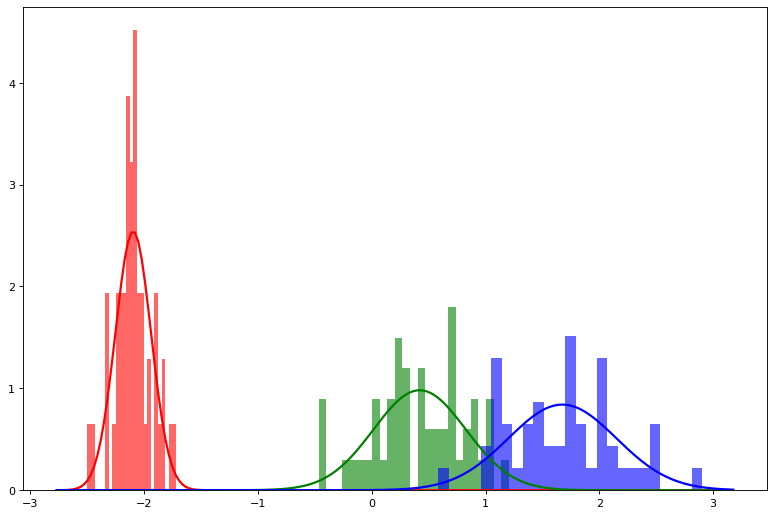

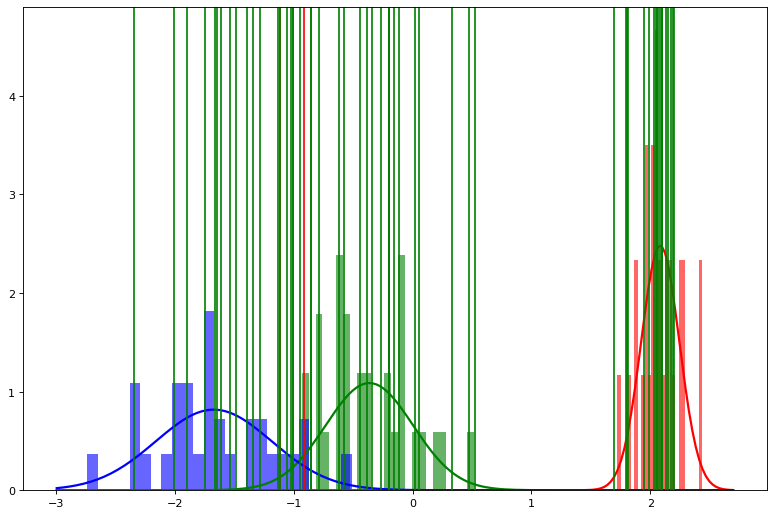

Two plots are displayed to look at the inner workings of the LDA, the first shows the plot with the fit of the training data along with the gaussien estimation od the distribution.
The second shows the plot of the training data with the predction represented as green or red lines (green when correct and red when incorrect) 


In [198]:
# test the algorithm on the iris dataset t6he plo

from sklearn import datasets
iris = datasets.load_iris()
#iris = datasets.load_digits()
X = iris.data # we only take the first two features.
y = iris.target

test1 = LDAClassifier()
test1.fit(X,y)
test1.plotFit()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40)
test2 = LDAClassifier()
test2.fit(X_train,y_train)
test2.plotpred(X_test,y_test)
print("Two plots are displayed to look at the inner workings of the LDA, the first shows the plot with the fit of the training data along "
      "with the gaussien estimation od the distribution.")
print("The second shows the plot of the training data with the prediction represented as green or red lines (green when correct and red when incorrect"
      ") looking at the data mistakes are made mostly are the intersection of the gausiien distributions")


19) Importez le module sklearn.discriminant_analysis qui contient en particulier la classe LinearDiscriminantAnalysis qui nous servira dans la suite.

In [203]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

dataSet = datasets.load_iris()
X = dataSet.data # we only take the first two features.
y = dataSet.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


scikit_lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
scikit_pred = scikit_lda.predict(X_test)
my_lda = LDAClassifier().fit(X_train,y_train)
my_pred = my_lda.predict(X_test)
scikit_pred == my_pred
print(f"Looking at the compariosn of the scikit_pred and my_pred  we see that my classifier has classified {np.sum(scikit_pred == my_pred)}"
      f" inputs out of {len(scikit_pred == my_pred)} the same way as scikit. The difference between the two has been investifated but cannot be resolved")


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

Looking at the compariosn of the scikit_pred and my_pred  we see that my classifier has classified 49 inputs out of 50 the same way as scikit 


19)En utilisant votre classe LDAClassifier, visualisez la règle de classification pour les jeux de données #1 et #3. (Vous pouvez utiliser la fonction frontiere_new.) Discutez l’efficacité de la méthode dans ces deux cas.


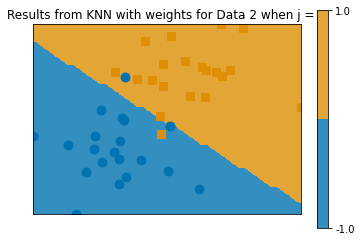

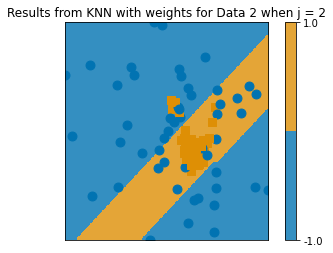

In [204]:
working_set = set1
X = working_set[0]
y = working_set[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
my_class = LDAClassifier()
my_class.fit(X_train,y_train)
sc.frontiere_new(partial(frontiere_predict,model=my_class,X=X), X,y)
_=plt.title(f"Results from LDA on set 1")
_=plt.show()

working_set = set3
X = working_set[0]
y = working_set[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
my_class = LDAClassifier()
my_class.fit(X_train,y_train)
sc.frontiere_new(partial(frontiere_predict,model=my_class,X=X), X,y)
_=plt.title(f"Results from LDA on set 3")
_=plt.show()


21) Appliquez la classification par régression logistique sur les données rand_bi_gauss. Comparer les résultats avec la LDA, notamment lorsque une classe est beaucoup plus petite que l’autre (a beau- coup moins d’observations). On parle alors de classes déséquilibrées.


In [234]:
from sklearn import linear_model

working_set = set1
X = working_set[0]
y = working_set[1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
log_reg = linear_model.LogisticRegression()
_=log_reg.fit(X_train, y_train)
log_reg_score_=log_reg.score(X_test, y_test)
sk_LDAClassifier= LinearDiscriminantAnalysis()
_=sk_LDAClassifier.fit(X_train, y_train)
lda_score_=sk_LDAClassifier.score(X_test, y_test)
print("For proportionally distributed classes:")
print(f" - LDA {lda_score_} ")
print(f" - Linear regression{log_reg_score_} ")

working_set = set1_uneven
X = working_set[0]
y = working_set[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
log_reg = linear_model.LogisticRegression()
_=log_reg.fit(X_train, y_train)
log_reg_score_=log_reg.score(X_test, y_test)
sk_LDAClassifier= LinearDiscriminantAnalysis()
_=sk_LDAClassifier.fit(X_train, y_train)
lda_score_=sk_LDAClassifier.score(X_test, y_test)
print(f"For Unevenly distributed classes ({np.unique(y_train, return_counts=True)[1]}):")
print(f" - LDA {lda_score_} ")
print(f" - Linear regression {log_reg_score_} ")

print(f" It would seem that LDA performs better fro eneven classes wheres linear regression perfoms better for even classes")


For proportionally distributed classes:
 - LDA 1.0 
 - Linear regression1.0 
For Unevenly distributed classes ([135  12]):
 - LDA 0.9452054794520548 
 - Linear regression0.9315068493150684 
 It would seem that LDA performs better fro eneven classes wheres linear regression perfoms better for even classes


22) À quoi correspond la variable coef_ du modèle ? intercept_ ?



In [235]:
print(f"Coefficient : {log_reg.coef_} (this corresponds to the normal vecteur of the boundary line)")
print(f"Intercept : {log_reg.intercept_} (this corresponds to the intercept of the boundary and the axis)")

Coefficient : [[1.47 1.76]] (this corresponds to the normal vecteur of the boundary line)
Intercept : [-2.85] (this corresponds to the intercept of the boundary and the axis)


23) Utiliser la fonction frontiere_new pour visualiser la frontière de décision.

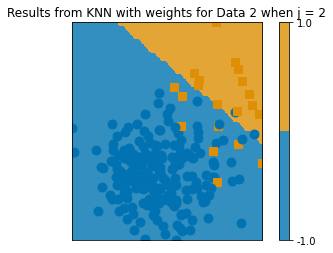

In [236]:

sc.frontiere_new(partial(frontiere_predict,model=log_reg,X=X), X,y)
_=plt.title(f"Results from LDA with uneven inputs")
_=plt.show()

24) Appliquez la classification par régression logistique à des données issues de la base digits. Comme précédemment, coupez l’échantillon en deux parties de même taille et utilisez la première partie pour l’apprentissage et la deuxième pour tester. Indiquez le taux d’erreur.

In [266]:
dataSet = datasets.load_digits()
X = dataSet.data # we only take the first two features.
y = dataSet.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)

log_reg = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')
_=log_reg.fit(X_train,  y_train)

error = 1-log_reg.score(X_test, y_test)
print(f"The error is  {error}")


The error is  0.05672969966629593
